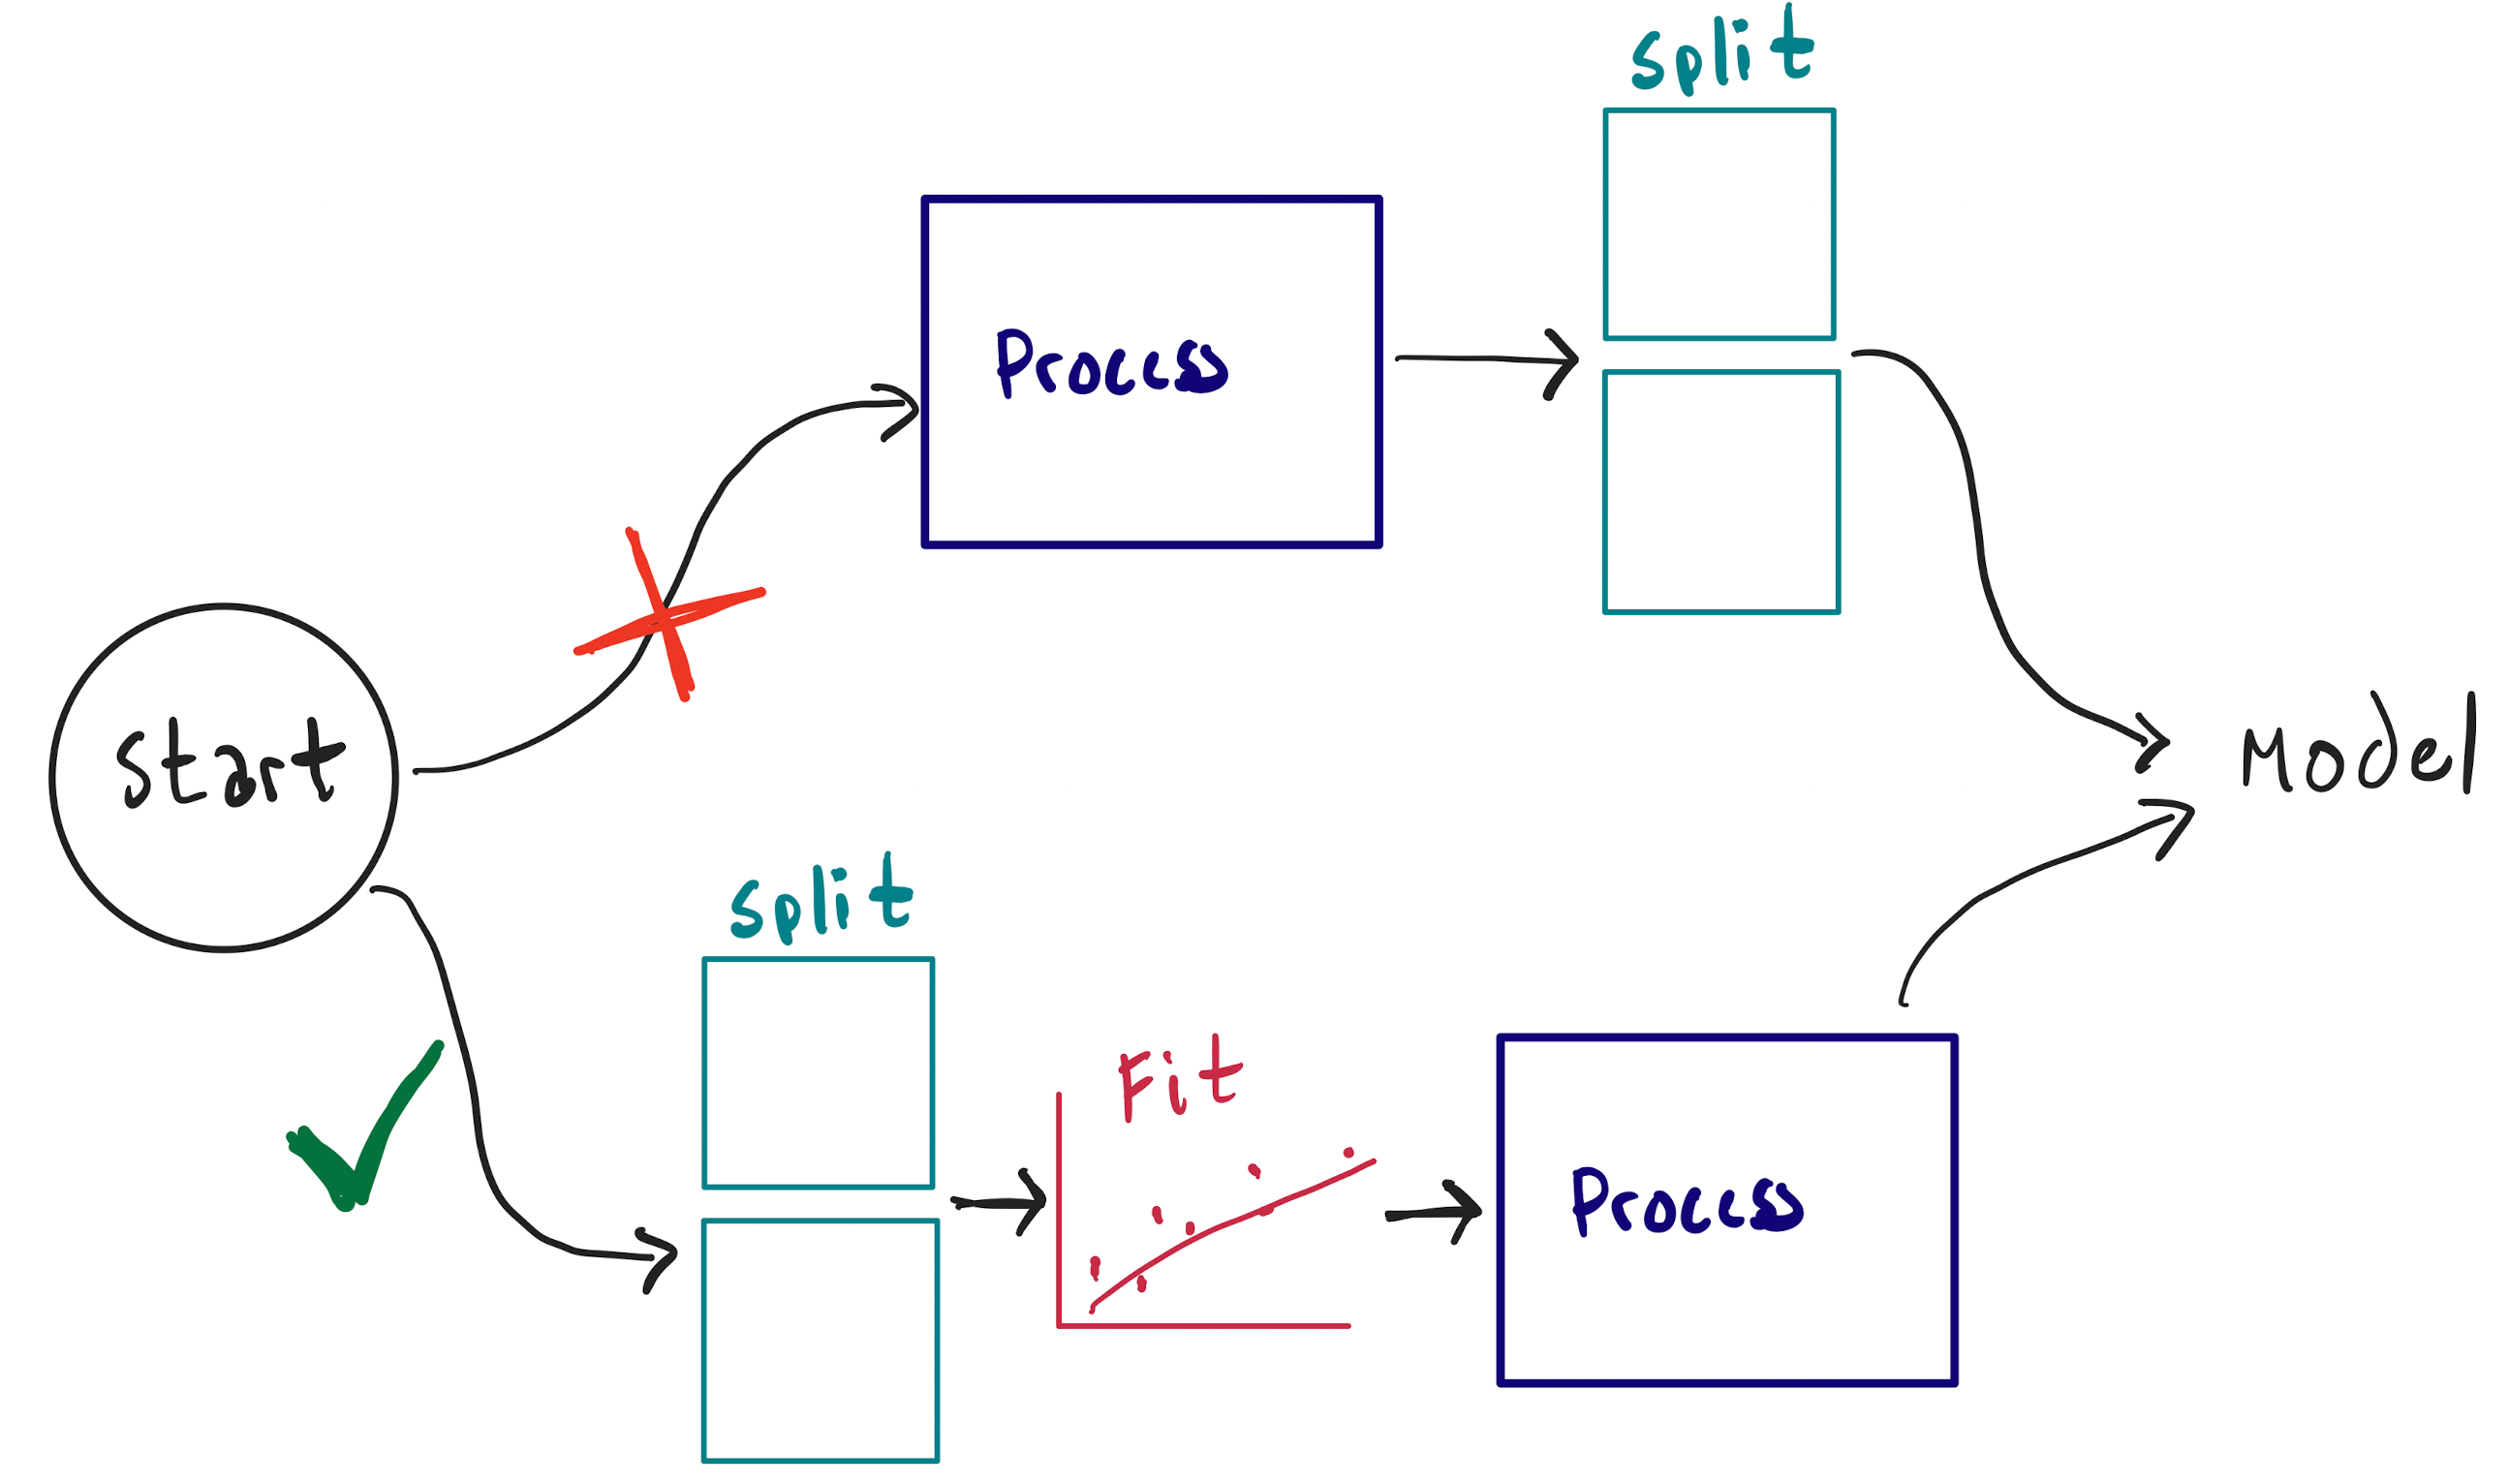

❗️Don't let your model see 👀 your "test" data ❗️ 

In [1]:
options(repr.plot.res = 250, repr.plot.height = 3, repr.plot.width = 4)

library('tidyverse')
library('tidymodels')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.9      ✔ rsample      0.1.0 
✔ dials        0.0.9      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.3 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.8 
✔ recipes      0.1.16     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks

Pull in the `ames` data.

In [2]:
data(ames, package = "modeldata")

In [3]:
ames %>% head

MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,⋯,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,5,2010,WD,Normal,215000,-93.61975,42.05403
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.61976,42.05301
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.61939,42.05266
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,4,2010,WD,Normal,244000,-93.61732,42.05125
Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.63893,42.06090
Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,No_Fence,None,0,6,2010,WD,Normal,195500,-93.63893,42.06078


We want to "model" `Sale_Price`

In [4]:
# ?recipe

In [5]:
ames_split = initial_split(ames)

ames_training = training(ames_split)
ames_testing = testing(ames_split)

We want to simplify the `Neighborhood` data. Too many categories and skewed.

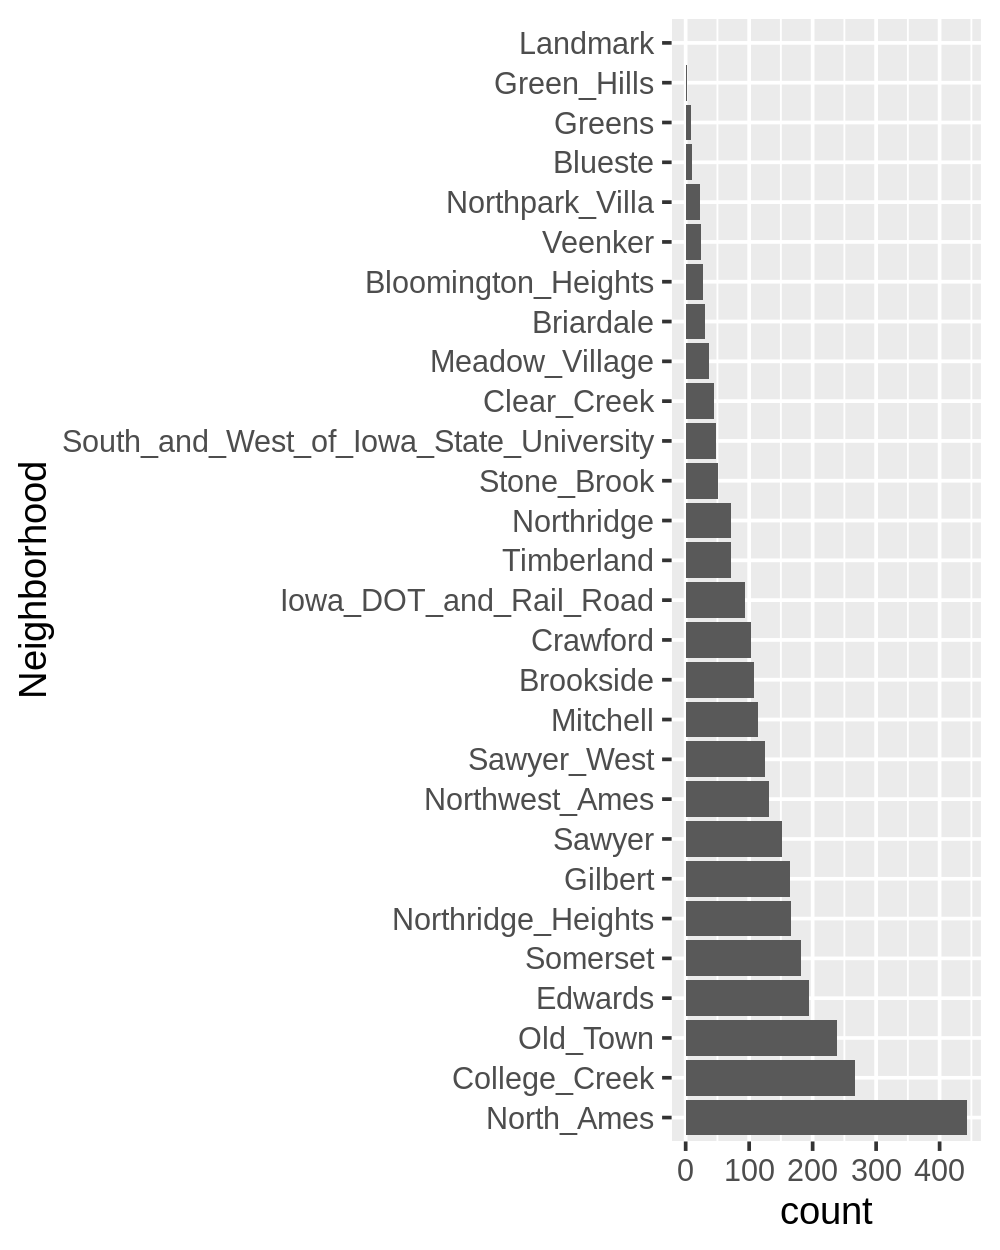

In [6]:
options(repr.plot.res = 250, repr.plot.height = 5, repr.plot.width = 4)

p = ggplot(ames, aes(y = Neighborhood))

p = p + geom_bar()

p

We can't use the full data because that would make our model aware of categories potentially not in the training data.

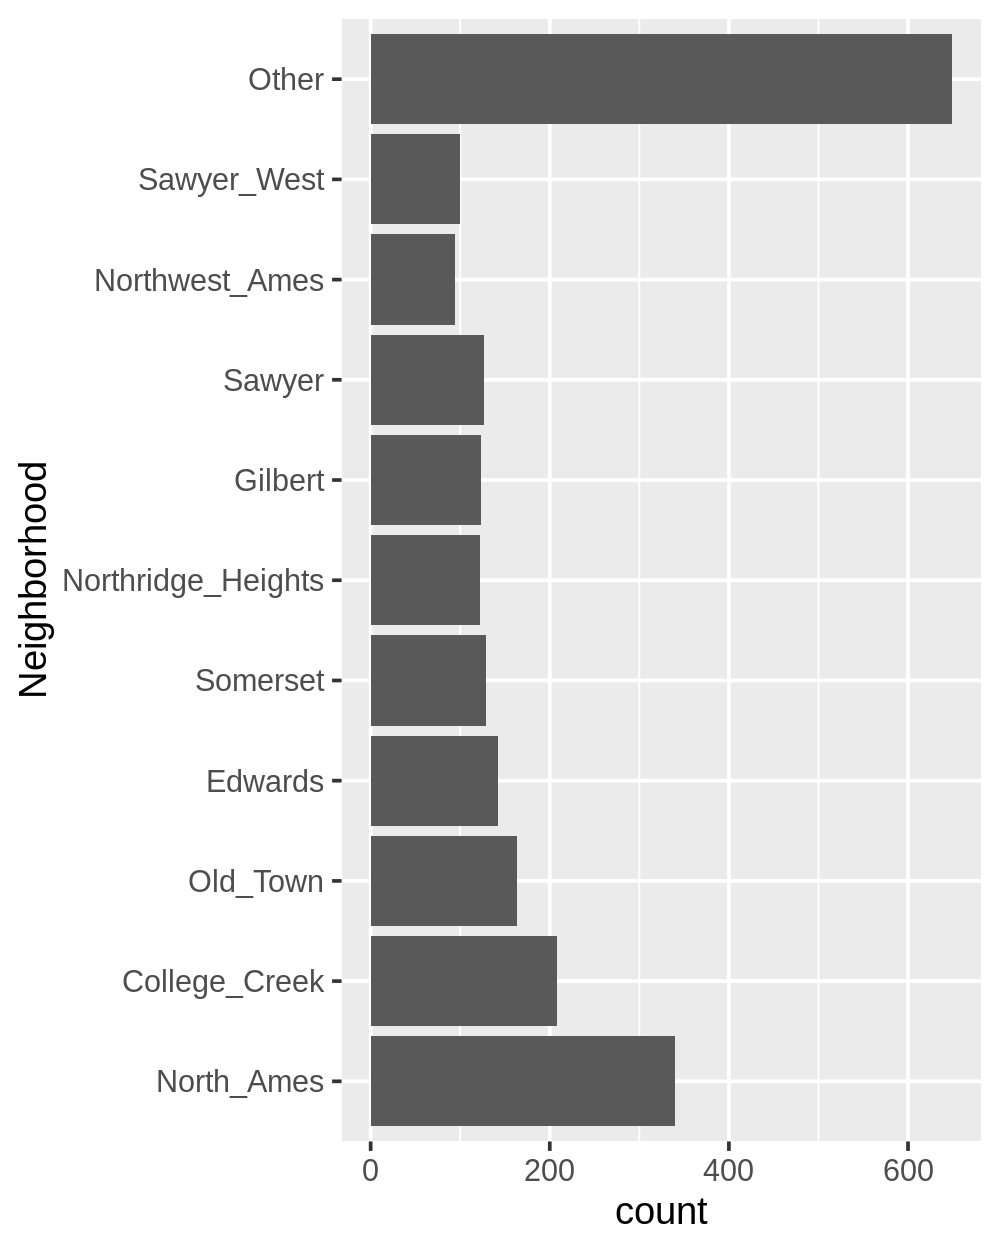

In [7]:
ames_tmp = ames_training %>%
    mutate(Neighborhood = fct_lump(Neighborhood, n = 10))

p = ggplot(ames_tmp, aes(y = Neighborhood))

p = p + geom_bar()

p

But how do we "apply" this to our testing data?

Let's use a `recipe` instead.

1. specify predictors and add training data
1. add steps
1. `prep`
1. `bake`

In [8]:
ames_recipe = recipe(Sale_Price ~ ., data = ames_training)

ames_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         73

In [9]:
ames_recipe = ames_recipe %>% step_other(Neighborhood, threshold = 0.05)

ames_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         73

Operations:

Collapsing factor levels for Neighborhood

In [10]:
ames_recipe = ames_recipe %>% prep()

ames_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         73

Training data contained 2197 data points and no missing data.

Operations:

Collapsing factor levels for Neighborhood [trained]

In [11]:
ames_recipe = recipe(Sale_Price ~ ., data = ames_training) %>%
    step_other(Neighborhood, threshold = 0.05) %>%
    prep()

ames_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         73

Training data contained 2197 data points and no missing data.

Operations:

Collapsing factor levels for Neighborhood [trained]

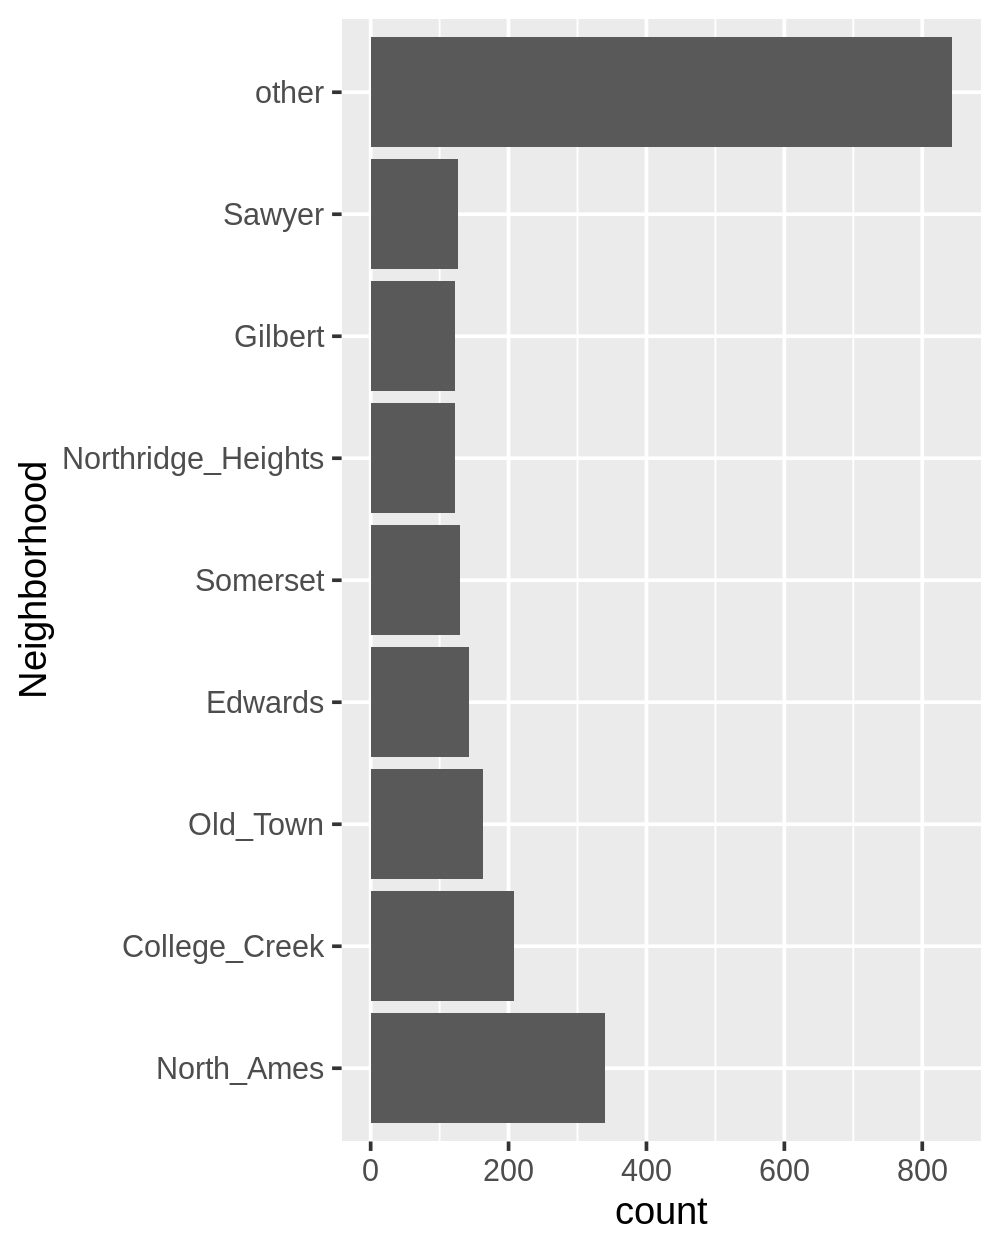

In [12]:
ames_training_baked = bake(ames_recipe, new_data = NULL)

p = ggplot(ames_training_baked, aes(y = Neighborhood))

p = p + geom_bar()

p

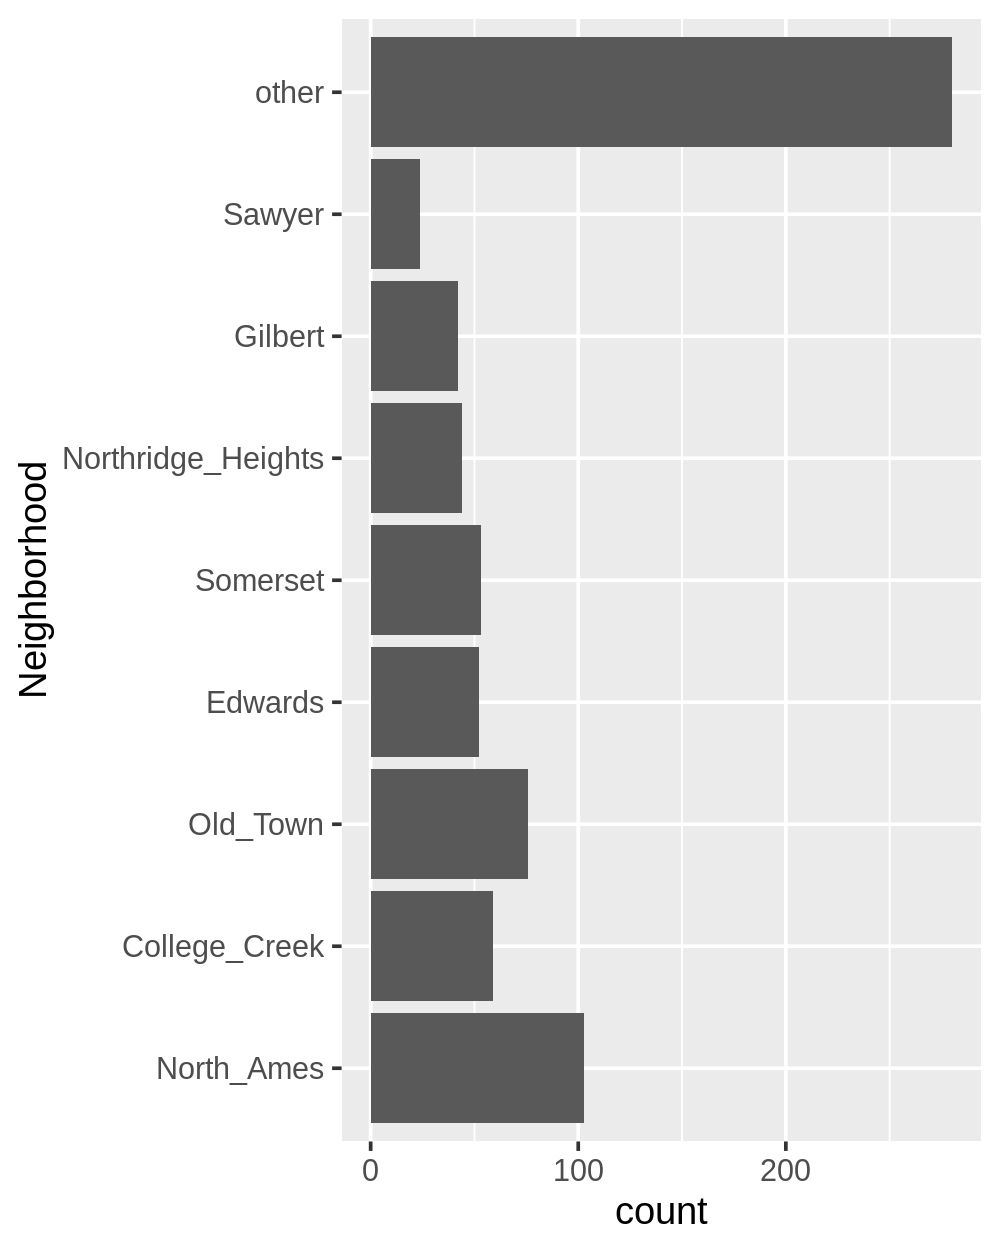

In [13]:
ames_testing_baked = bake(ames_recipe, new_data = ames_testing)

p = ggplot(ames_testing_baked, aes(y = Neighborhood))

p = p + geom_bar()

p